# README

In this Python notebook, multiple trials with different settings were tested for each dataset, but only the code for the diagrams included in the master thesis is written here.

To generate the diagrams more quickly, 300 samples were randomly selected from each dataset. This significantly reduces computing time without altering the results.


In [1]:
#Import all the functions to execute the BO-Framework
from importlib import reload

import BO_functions.BO_framework as BO_framework; reload(BO_framework)
import BO_functions.Graph_BO_framework as Graph_BO_framework; reload(Graph_BO_framework)
import BO_functions.utils as utils; reload(utils)
import BO_functions.prior_selection_alg as prior_selection_alg; reload(prior_selection_alg)

from BO_functions.BO_framework import *
from BO_functions.Graph_BO_framework import *
from BO_functions.utils import *
from BO_functions.prior_selection_alg import *

#Import kernels:
#For binary vectors:
from BO_functions.Kernels import TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel
#For molecular descriptors (Mordred):
from BO_functions.Kernels import RBFKernel, MaternKernel, LinearKernel, RQKernel

import numpy as np
np.random.seed(42)

# ESOL dataset

In [ ]:
#Select the dataset, options: [Photoswitch, ESOL, FreeSolv, Lipophilicity]
dataset = 'ESOL'
#Select the type of representation, options: "ecfp_fingerprints", "fragments", "ecfp_fragprints"
representation_type = 'ecfp_fingerprints'

#Load the molecular dataset:
X_mol_binary, y_mol_binary = load_vec_representations(dataset, representation_type)
#Select 300 random picked samples
num_samples = 300  
total_samples = X_mol_binary.shape[0]  

np.random.seed(42)
selected_indices = np.random.choice(total_samples, size=num_samples, replace=False)

X_mol_binary = X_mol_binary[selected_indices]
y_mol_binary = y_mol_binary[selected_indices]

#Information of the data 
print(f'Total of {X_mol_binary.shape[0]} molecules, each with {X_mol_binary.shape[1]} features ({representation_type} representation)')
print(f'Highest label value: {np.max(y_mol_binary)}. Lowest label value: {np.min(y_mol_binary)}')
print(f'Mean label score of the dataset: {np.mean(y_mol_binary)}, standard deviation: {np.std(y_mol_binary):.2f}')

Total of 300 molecules, each with 2048 features (ecfp_fingerprints representation)
Highest label value: 1.144. Lowest label value: -9.15
Mean label score of the dataset: -3.1612966666666664, standard deviation: 2.15


Restult with the defined model with photoswitches:

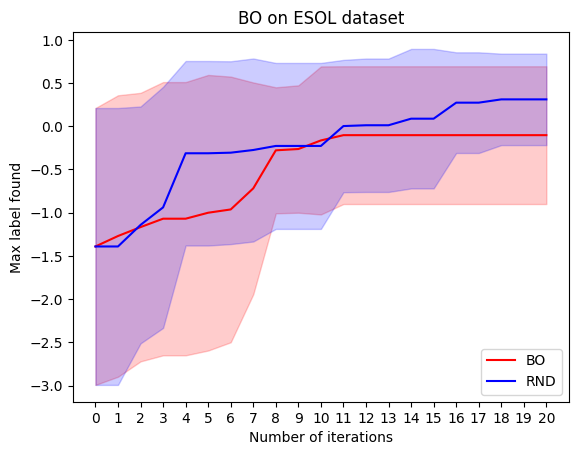

In [ ]:
#Inner product kernel: with UCB-EI, InnerProductKernel, fingerprints,
#Set the difernet parameters to run multiple BO active searches and plot an average of them all
#making a comparison with the random search!
data = utils.run_multiple_trials(n_trials=10,
                                X_set=X_mol_binary, y_set=y_mol_binary,
                                kernel=InnerProductKernel,
                                acquisition_function='UCB-EI',
                                smart_selection='none',
                                representation='Bin_vec',
                                start_set_size=0.01,
                                bo_n_iteration=20,
                                reproducibility=True)
plot_multiple_trial_iteration(data, title_name= 'BO on ESOL dataset', x_label='Number of iterations', y_label= 'Max label found')

Best found combination

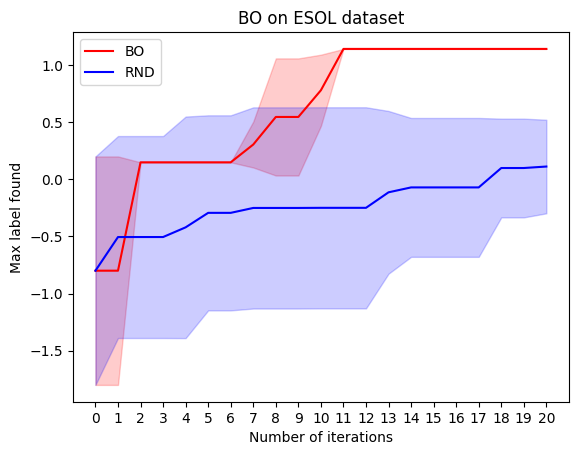

In [ ]:
#Inner product kernel: with UCB-EI, ForbesKernel, fingerprints, least_sim_seq
#Set the difernet parameters to run multiple BO active searches and plot an average of them all
#making a comparison with the random search!
data = utils.run_multiple_trials(n_trials=10,
                                X_set=X_mol_binary, y_set=y_mol_binary,
                                kernel=ForbesKernel,
                                acquisition_function='UCB-EI',
                                smart_selection='least_sim_seq',
                                representation='Bin_vec',
                                start_set_size=0.01,
                                bo_n_iteration=20,
                                reproducibility=True)
plot_multiple_trial_iteration(data, title_name= 'BO on ESOL dataset', x_label='Number of iterations', y_label= 'Max label found')

# FreeSolv dataset

In [5]:
#Select the dataset, options: [Photoswitch, ESOL, FreeSolv, Lipophilicity]
dataset = 'FreeSolv'
#Select the type of representation, options: "ecfp_fingerprints", "fragments", "ecfp_fragprints"
representation_type = 'ecfp_fragprints'

#Load the molecular dataset:
X_mol_binary, y_mol_binary = load_vec_representations(dataset, representation_type)
num_samples = 400  
total_samples = X_mol_binary.shape[0]  

np.random.seed(42)
selected_indices = np.random.choice(total_samples, size=num_samples, replace=False)

X_mol_binary = X_mol_binary[selected_indices]
y_mol_binary = y_mol_binary[selected_indices]

#Information of the data 
print(f'Total of {X_mol_binary.shape[0]} molecules, each with {X_mol_binary.shape[1]} features ({representation_type} representation)')
print(f'Highest label value: {np.max(y_mol_binary)}. Lowest label value: {np.min(y_mol_binary)}')
print(f'Mean label score of the dataset: {np.mean(y_mol_binary)}, standard deviation: {np.std(y_mol_binary):.2f}')

Total of 400 molecules, each with 2133 features (ecfp_fragprints representation)
Highest label value: 3.43. Lowest label value: -25.47
Mean label score of the dataset: -3.7491499999999998, standard deviation: 4.01


Restult with the defined model with photoswitches:

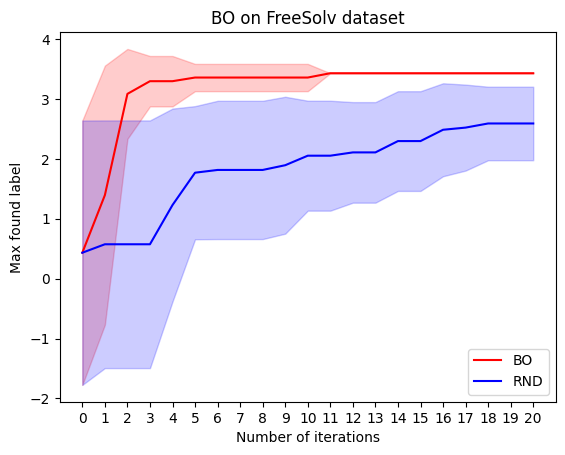

In [6]:
#Inner product kernel: with UCB-EI, InnerProductKernel, fingerprints, least_sim_seq
#Set the difernet parameters to run multiple BO active searches and plot an average of them all
#making a comparison with the random search!
data = utils.run_multiple_trials(n_trials=10,
                                X_set=X_mol_binary, y_set=y_mol_binary,
                                kernel=InnerProductKernel,
                                acquisition_function='UCB-EI',
                                smart_selection='none',
                                representation='Bin_vec',
                                start_set_size=0.01,
                                bo_n_iteration=20,
                                reproducibility=True)
plot_multiple_trial_iteration(data, title_name= 'BO on FreeSolv dataset', x_label='Number of iterations', y_label= 'Max found label')

Best found combination

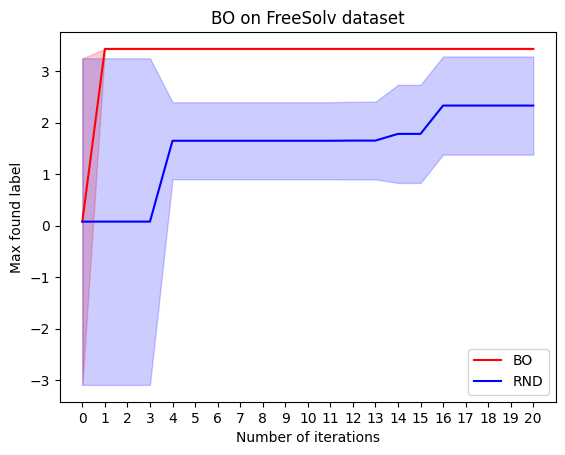

In [7]:
#Inner product kernel: with UCB-EI, InnerProductKernel, fingerprints, least_sim_seq
#Set the difernet parameters to run multiple BO active searches and plot an average of them all
#making a comparison with the random search!
data = utils.run_multiple_trials(n_trials=3,
                                X_set=X_mol_binary, y_set=y_mol_binary,
                                kernel=ForbesKernel,
                                acquisition_function='UCB-EI',
                                smart_selection='select_kmeans_plusplus',
                                representation='Bin_vec',
                                start_set_size=0.01,
                                bo_n_iteration=20,
                                reproducibility=True)
plot_multiple_trial_iteration(data, title_name= 'BO on FreeSolv dataset', x_label='Number of iterations', y_label= 'Max found label')

# Lipophilicity

In [8]:
#Select the dataset, options: [Photoswitch, ESOL, FreeSolv, Lipophilicity]
dataset = 'Lipophilicity'
#Select the type of representation, options: "ecfp_fingerprints", "fragments", "ecfp_fragprints"
representation_type = 'ecfp_fingerprints'

#Load the molecular dataset:
X_mol_binary, y_mol_binary = load_vec_representations(dataset, representation_type)
num_samples = 400  
total_samples = X_mol_binary.shape[0]  

np.random.seed(42)
selected_indices = np.random.choice(total_samples, size=num_samples, replace=False)

X_mol_binary = X_mol_binary[selected_indices]
y_mol_binary = y_mol_binary[selected_indices]

#Information of the data 
print(f'Total of {X_mol_binary.shape[0]} molecules, each with {X_mol_binary.shape[1]} features ({representation_type} representation)')
print(f'Highest label value: {np.max(y_mol_binary)}. Lowest label value: {np.min(y_mol_binary)}')

Total of 400 molecules, each with 2048 features (ecfp_fingerprints representation)
Highest label value: 4.49. Lowest label value: -1.2


Restult with the defined model with photoswitches:

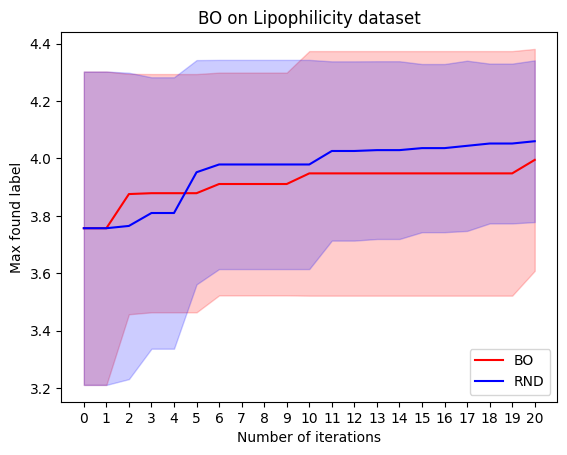

In [9]:
#Inner product kernel: with UCB-EI, InnerProductKernel, fingerprints, least_sim_seq
#Set the difernet parameters to run multiple BO active searches and plot an average of them all
#making a comparison with the random search!
data = utils.run_multiple_trials(n_trials=10,
                                X_set=X_mol_binary, y_set=y_mol_binary,
                                kernel=InnerProductKernel,
                                acquisition_function='UCB-EI',
                                smart_selection='none',
                                representation='Bin_vec',
                                start_set_size=0.05,
                                bo_n_iteration=20,
                                reproducibility=True)
plot_multiple_trial_iteration(data, title_name= 'BO on Lipophilicity dataset', x_label='Number of iterations', y_label= 'Max found label')

No combination found to imporve the BO-Framework 

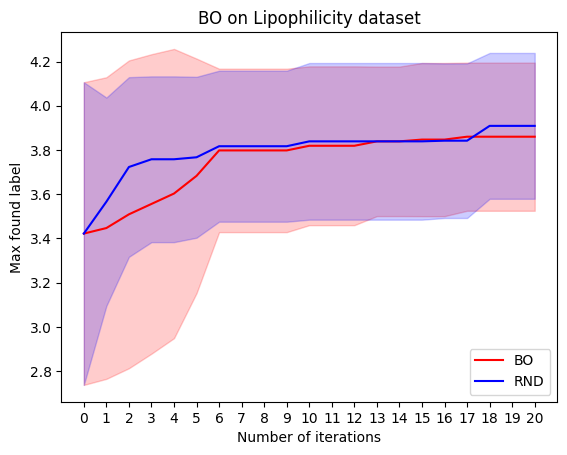

In [10]:
#Inner product kernel: with UCB-EI, InnerProductKernel, fingerprints, least_sim_seq
#Set the difernet parameters to run multiple BO active searches and plot an average of them all
#making a comparison with the random search!
data = utils.run_multiple_trials(n_trials=10,
                                X_set=X_mol_binary, y_set=y_mol_binary,
                                kernel=TanimotoKernel,
                                acquisition_function='UCB-EI',
                                smart_selection='none',
                                representation='Bin_vec',
                                start_set_size=0.01,
                                bo_n_iteration=20,
                                reproducibility=True)
plot_multiple_trial_iteration(data, title_name= 'BO on Lipophilicity dataset', x_label='Number of iterations', y_label= 'Max found label')